In [49]:
import json
import pandas as pd
import numpy as np
from youtube_transcript_api import YouTubeTranscriptApi

In [75]:
mkbhd_s21_review = YouTubeTranscriptApi.get_transcript('tn2AgrwXpNQ')

In [76]:
with open('mkbhd_s21_review.json', 'w') as json_file:
    json.dump(mkbhd_s21_review, json_file)

In [79]:
data_mkbhd_s21 = pd.read_json("mkbhd_s21_review.json")

In [80]:
print("Mkbhd s21 review transcript")
print(data_mkbhd_s21['text'])

Mkbhd s21 review transcript
0                                       [Music]
1                                            yo
2            do you remember when samsung spent
3          entire three minutes straight in the
4          keynote just talking about the matte
                         ...                   
477    that will now be in the works either way
478                              that's been it
479      thanks for watching catch you guys the
480                                    next one
481                                       peace
Name: text, Length: 482, dtype: object


In [81]:
cols_list = ['text', 'start']
negative = ['bad', 'disappointed', 'cheap', 'frustrating', 'poor', 'faulty',
           'atrocious', 'awful', 'crummy', 'dreadful', 'lousy',
           'poor', 'rough', 'sad', 'unacceptable', 'garbage', 'junk',
           'substandard', 'second-rate', 'deficient']
positive = ['good', 'remarkable', 'great', 'fine', 'quality', 'superior',
           'satisfactory', 'up to scratch']
print(cols_list)
tally_pos = data_mkbhd_s21[data_mkbhd_s21[cols_list].stack().str.contains('|'.join(positive),case=False,na=False).any(level=0)]
tally_neg = data_mkbhd_s21[data_mkbhd_s21[cols_list].stack().str.contains('|'.join(negative),case=False,na=False).any(level=0)]

['text', 'start']


In [82]:
print('positive impression')
print(tally_pos)

print('\n','negative impression')
print(tally_neg)

positive impression
                                         text    start  duration
10       21 ultra and it's an incredibly good   27.760     4.720
21   a really good phone to a great one so of   47.600     4.320
59        is as good as it gets i was kind of  111.840     3.200
60    worried it would look great out the box  113.439     3.360
64                       been shockingly good  119.920     3.120
106  so you can expect good stuff and you see  196.080     3.360
215  looks great on this oled display and can  389.759     3.761
240    and that looks great on paper right in  430.160     3.680
242   i've had a very good battery experience  433.840     3.440
263   very good battery life on one day i got  477.440     3.360
290       changed more than the photo quality  529.519     3.841
291  photo quality is still roughly what we'd  531.440     3.760
326   it's great the results are still insane  594.560     4.000
350                takes really solid quality  638.399     5.521
375  

In [88]:
data_mkbhd_s21_final = data_mkbhd_s21.merge(tally_neg, how='outer', on=['start'])

In [89]:
data_mkbhd_s21_final = data_mkbhd_s21_final.merge(tally_pos, how='outer', on=['start'])

In [90]:
data_mkbhd_s21_final

,text_x,start,duration_x,text_y,duration_y,text,duration
0,[Music],0.460,3.300,NaN,NaN,NaN,NaN
1,yo,3.199,2.001,NaN,NaN,NaN,NaN
2,do you remember when samsung spent,3.760,2.880,NaN,NaN,NaN,NaN
3,entire three minutes straight in the,5.200,2.800,NaN,NaN,NaN,NaN
4,keynote just talking about the matte,6.640,3.680,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
477,that will now be in the works either way,869.279,3.601,NaN,NaN,NaN,NaN
478,that's been it,872.079,2.880,NaN,NaN,NaN,NaN
479,thanks for watching catch you guys the,872.880,4.480,NaN,NaN,NaN,NaN
480,next one,874.959,2.401,NaN,NaN,NaN,NaN


In [91]:
data_mkbhd_s21_final['negative_count'] = np.where(data_mkbhd_s21_final.text_y.isnull(), 0, 1)
data_mkbhd_s21_final['positive_count'] = np.where(data_mkbhd_s21_final.text.isnull(), 0, 1)

In [92]:
data_mkbhd_s21_final

,text_x,start,duration_x,text_y,duration_y,text,duration,negative_count,positive_count
0,[Music],0.460,3.300,NaN,NaN,NaN,NaN,0,0
1,yo,3.199,2.001,NaN,NaN,NaN,NaN,0,0
2,do you remember when samsung spent,3.760,2.880,NaN,NaN,NaN,NaN,0,0
3,entire three minutes straight in the,5.200,2.800,NaN,NaN,NaN,NaN,0,0
4,keynote just talking about the matte,6.640,3.680,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...
477,that will now be in the works either way,869.279,3.601,NaN,NaN,NaN,NaN,0,0
478,that's been it,872.079,2.880,NaN,NaN,NaN,NaN,0,0
479,thanks for watching catch you guys the,872.880,4.480,NaN,NaN,NaN,NaN,0,0
480,next one,874.959,2.401,NaN,NaN,NaN,NaN,0,0


In [93]:
total_positive = np.sum(data_mkbhd_s21_final['positive_count']).astype(float)
total_positive

16.0

In [94]:
total_negative = np.sum(data_mkbhd_s21_final['negative_count']).astype(float)
total_negative

4.0

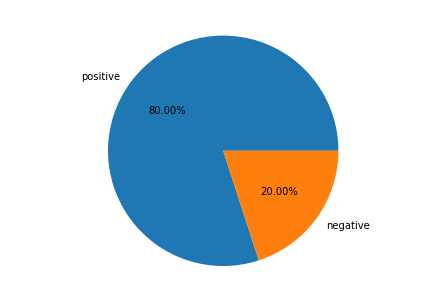

In [95]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0, 0 ,1 ,1])
ax.axis('equal')
langs = ['positive', 'negative']
total = [total_positive, total_negative]
ax.pie(total, labels = langs, autopct='%1.2f%%')
plt.show()